# Finding which borough has more complaints
# Find which complaint has been registered more number of times in that borough
# Find in what month more complaints have been registered on the complaint which is been registered more number of times

# We can find which borough has more number of issues!
# We can also check number of complaints (based on categories) in each borough.
# We can check the time taken to solve(close) the particular issue in that borough and also calculate the average time taken to close the issue
# We can check the number of complaints in a borough with respect to the complaint

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar

# Let's see which borough is facing more issues

In [20]:
dataframe = pd.read_csv('F:/Python_Project/1000linesfile.csv')
#df.to_csv(filename ,  index = False)
dataframe2 = dataframe.drop(['School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Location','Latitude','Longitude'],axis=1)

dataframe2['Created Date'] = pd.to_datetime(dataframe2['Created Date'])
dataframe2['Closed Date'] = pd.to_datetime(dataframe2['Closed Date'])

dataframe2['Time'] = dataframe2['Closed Date'] - dataframe2['Created Date']
dataframe2['weekday'] = dataframe2['Created Date'].dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataframe2['day_of_week'] = dataframe2['weekday'].apply(lambda x: days[x])


# get the highest number of complaints with respect to borough /  or the one you want to check
dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type', 'Time', 'Borough']].groupby(['Borough'])["Borough"].count().reset_index(name="count").sort_values(by='count', ascending=0)
dataframe3 = dataframe3.reset_index(drop = False)
dfborough = dataframe3
dfborough
#df.to_csv("filename" ,  index = False)

,index,Borough,count
0,1,BROOKLYN,297
1,3,QUEENS,254
2,2,MANHATTAN,212
3,0,BRONX,160
4,4,STATEN ISLAND,44
5,5,Unspecified,32


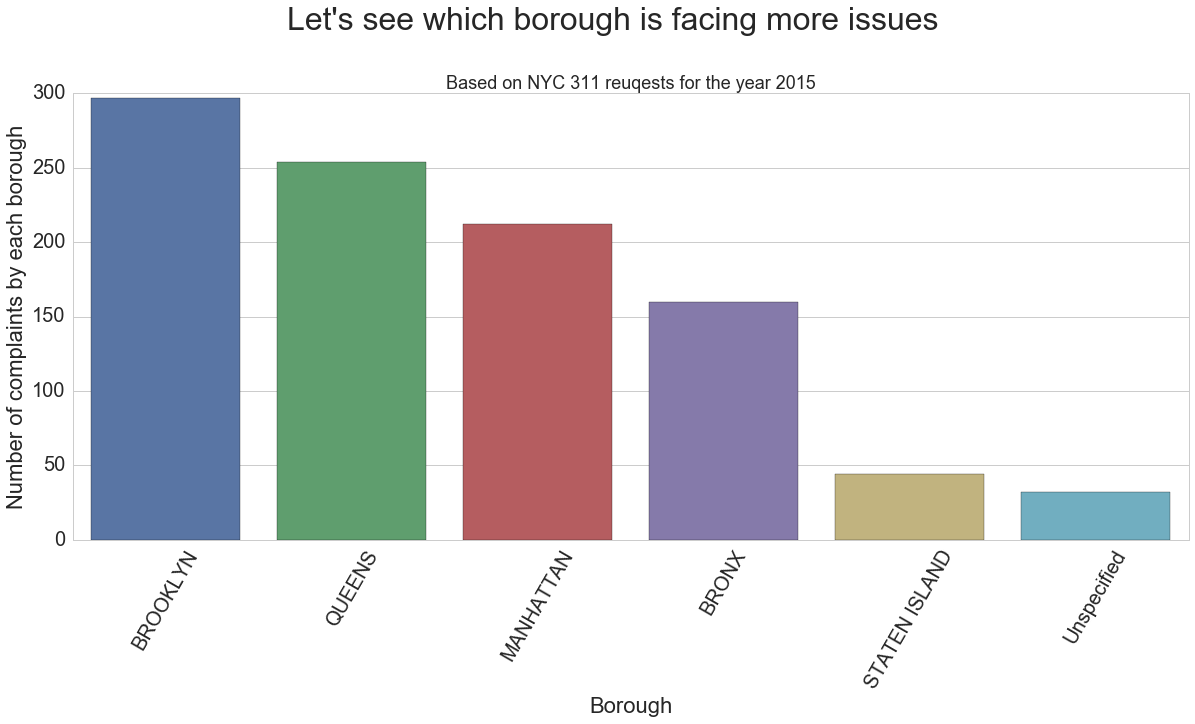

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Borough", y="count", data=dfborough)
plt.xlabel("Borough")
plt.ylabel("Number of complaints by each borough")
plt.suptitle("Let's see which borough is facing more issues", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/borough_issues.png", bbox_inches='tight')

# Lets check the complaints in each borough

In [21]:
print("Please enter the borough. If you do not enter, the borough with highest complaints will be consisdered!")
borough_input = input('Please enter which boroughs complaints you want to check:  ')

if borough_input == "":
    borough = dataframe3.ix[0,'Borough']
    print("Borough with more complaints:  ", borough)
else:
    borough = borough_input
    
dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type', 'Time', 'Borough']]
dataframe3 = dataframe3[dataframe3['Borough'] == borough].groupby(['Complaint Type'])["Complaint Type"].count().reset_index(name="count").sort_values(by='count', ascending=0)
dataframe3 =dataframe3.reset_index(drop = False)
dfcomplaints = dataframe3
dfcomplaints


Please enter the borough. If you do not enter, the borough with highest complaints will be consisdered!
Please enter which boroughs complaints you want to check:  
Borough with more complaints:   BROOKLYN


,index,Complaint Type,count
0,20,Illegal Parking,62
1,3,Blocked Driveway,55
2,27,Noise - Street/Sidewalk,29
3,24,Noise - Commercial,27
4,38,Street Condition,17
5,28,Noise - Vehicle,9
6,10,Derelict Vehicle,7
7,30,Overgrown Tree/Branches,6
8,9,Dead Tree,6
9,21,Indoor Air Quality,6


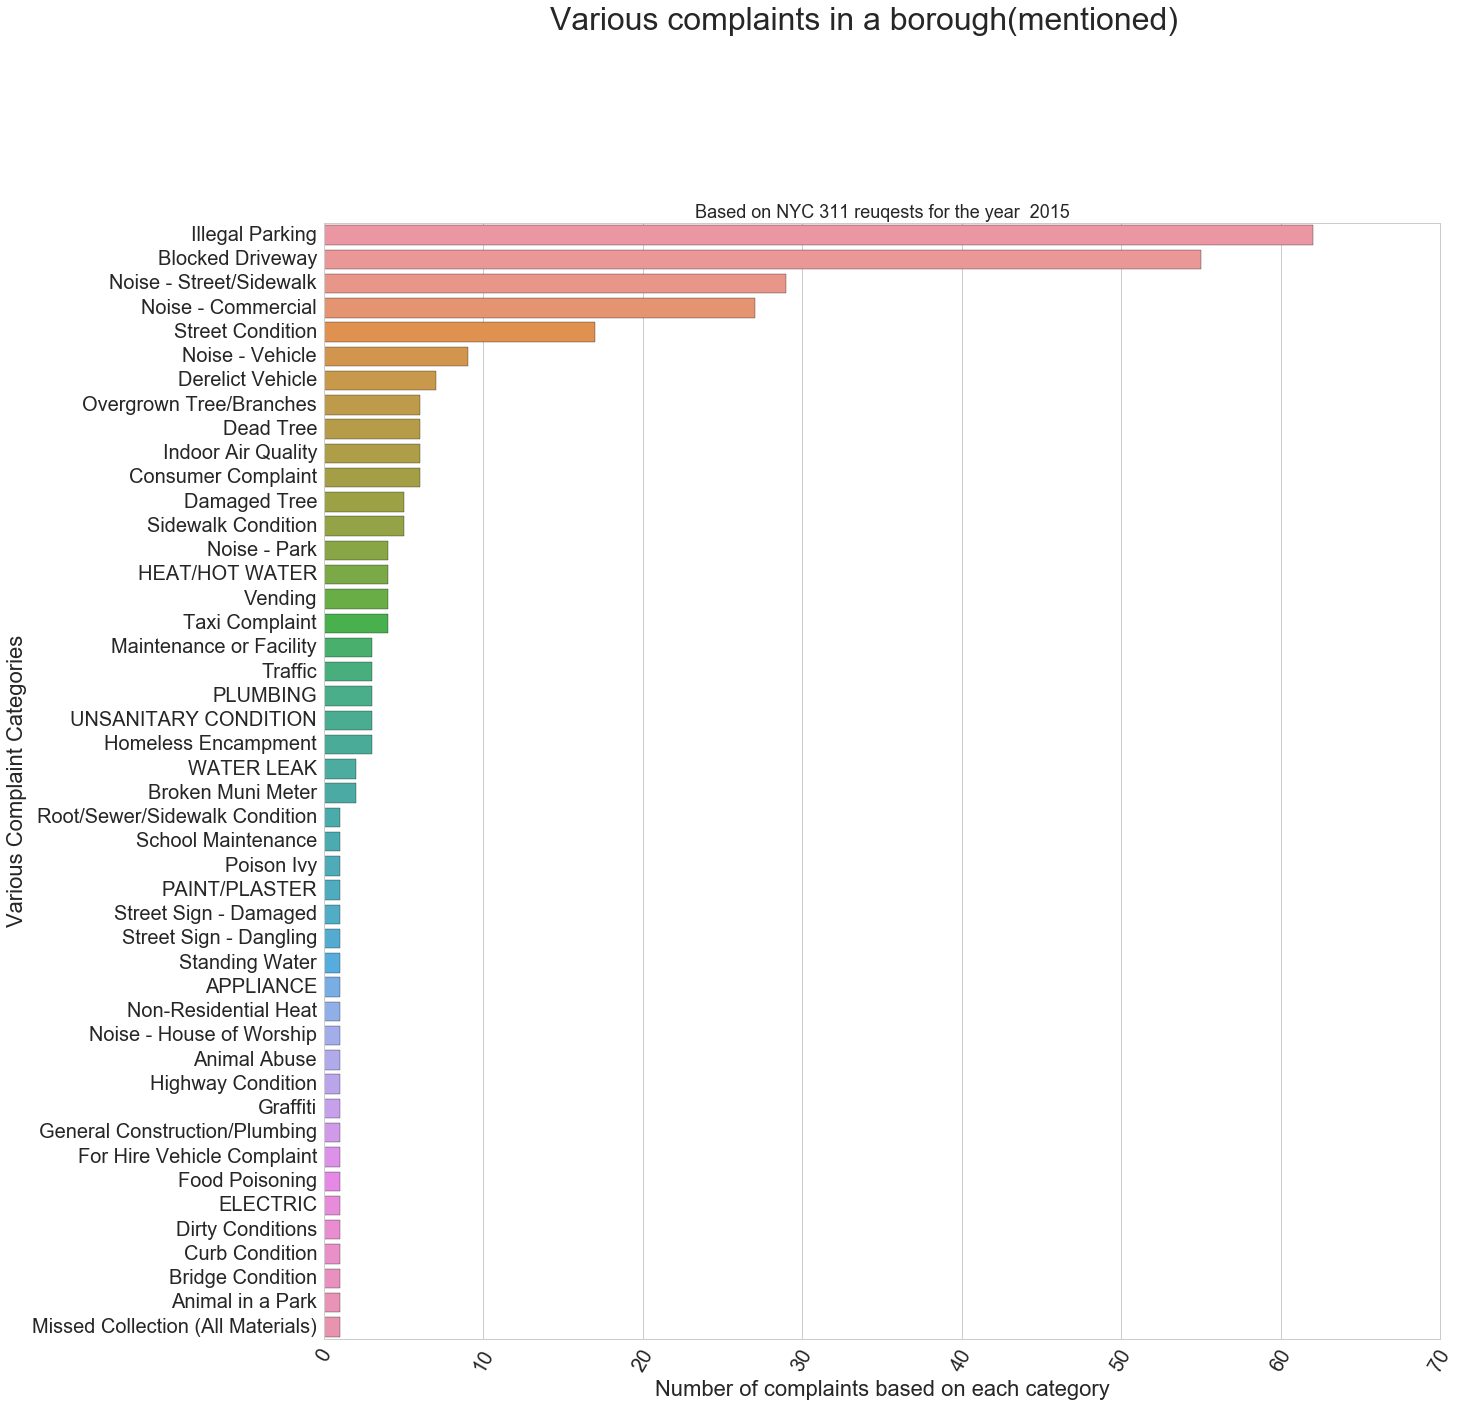

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="count", y="Complaint Type", data=dfcomplaints)
plt.xlabel("Number of complaints based on each category")
plt.ylabel("Various Complaint Categories")
plt.suptitle("Various complaints in a borough(mentioned)", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/complaints_count.png", bbox_inches='tight')

# Lets see how long it takes to solve the complaint

In [22]:
#get the type of complaint which is reported more number of times / or the one you want to check
print("Please enter the complaint type. If you do not enter, the complaint type with highest count will be consisdered!")
complaint_input = input('Please enter which boroughs complaints you want to check:  ')

if complaint_input == "":
    complaint = dataframe3.ix[0,'Complaint Type']
    print("More complaints are of type:  ",complaint)

else:
    complaint = complaint_input

# get the time required to solve the above complaint
dataframe3 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & (dataframe2['Borough'] == borough) & (dataframe2['Complaint Type'].str.contains(complaint))]
# dataframe3['date'] = dataframe3['Created Date'].dt.date
# dataframe3['hours'] = dataframe3['Created Date'].dt.time
# dataframe3['time_days'] = dataframe3['Time'].apply(lambda x: x.days)

dataframe3['Month'] = dataframe2['Created Date'].dt.month
dataframe3['Month'] = dataframe3['Month'].apply(lambda x: calendar.month_abbr[x])
dataframe3 = dataframe3[['Agency', 'Created Date','Month','Complaint Type', 'Time', 'Borough']]


# get the average time required to solve the complaint
average_time = dataframe3['Time'].mean()
print('Average Time taken to solve that complaint: ', average_time)

dfaveragetime = dataframe3
dfaveragetime

Please enter the complaint type. If you do not enter, the complaint type with highest count will be consisdered!
Please enter which boroughs complaints you want to check:  
More complaints are of type:   Illegal Parking
Average Time taken to solve that complaint:  0 days 03:57:58.612903


C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Agency,Created Date,Month,Complaint Type,Time,Borough
20,NYPD,2015-07-13 01:14:41,Jul,Illegal Parking,06:05:56,BROOKLYN
23,NYPD,2015-05-21 04:43:05,May,Illegal Parking,01:35:33,BROOKLYN
56,NYPD,2015-07-09 08:24:52,Jul,Illegal Parking,01:16:28,BROOKLYN
67,NYPD,2015-06-15 20:03:12,Jun,Illegal Parking,00:06:13,BROOKLYN
68,NYPD,2015-06-15 09:51:06,Jun,Illegal Parking,14:21:35,BROOKLYN
71,NYPD,2015-06-15 09:40:12,Jun,Illegal Parking,05:38:17,BROOKLYN
83,NYPD,2015-09-09 10:37:08,Sep,Illegal Parking,09:00:56,BROOKLYN
103,NYPD,2015-11-09 20:36:31,Nov,Illegal Parking,03:25:32,BROOKLYN
128,NYPD,2015-09-07 21:44:27,Sep,Illegal Parking,00:35:05,BROOKLYN
130,NYPD,2015-09-13 12:50:17,Sep,Illegal Parking,02:18:36,BROOKLYN


# get the number of complaints in every month based on the user input for complaint and the borough




In [26]:
# get the number of complaints in every month

print("Lets get number of complaints in every month based on the user input for complaint and the borough")
print("Please enter the borough. If you do not enter, the borough with highest complaints will be consisdered!")
borough_input = input('Please enter which boroughs complaints you want to check:  ')

if borough_input == "":
    borough = dataframe3.ix[0,'Borough']
    print("Borough with more complaints:  ", borough)
else:
    borough = borough_input
    
print("Please enter the complaint type. If you do not enter, the complaint type with highest count will be consisdered!")
complaint_input = input('Please enter which boroughs complaints you want to check:  ')

if complaint_input == "":
    complaint = dataframe3.ix[0,'Complaint Type']
    print("More complaints are of type:  ",complaint)
else:
    complaint = complaint_input

    
dataframe3 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & (dataframe2['Borough'] == borough) & (dataframe2['Complaint Type'].str.contains(complaint))]

dataframe3['Month'] = dataframe2['Created Date'].dt.month
dataframe3['Month'] = dataframe3['Month'].apply(lambda x: calendar.month_abbr[x])
dataframe3 = dataframe3[['Agency', 'Created Date','Month','Complaint Type', 'Time', 'Borough']]


dfmonthcount = dataframe3.groupby(['Month'])['Month'].count().reset_index(name="count")

Lets get number of complaints in every month based on the user input for complaint and the borough
Please enter the borough. If you do not enter, the borough with highest complaints will be consisdered!
Please enter which boroughs complaints you want to check:  MANHATTAN
Please enter the complaint type. If you do not enter, the complaint type with highest count will be consisdered!
Please enter which boroughs complaints you want to check:  Illegal Parking


C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
dfmonthcount

,Month,count
0,Apr,2
1,Aug,2
2,Feb,4
3,Jul,1
4,Jun,2
5,Mar,1
6,May,2
7,Oct,1
8,Sep,7


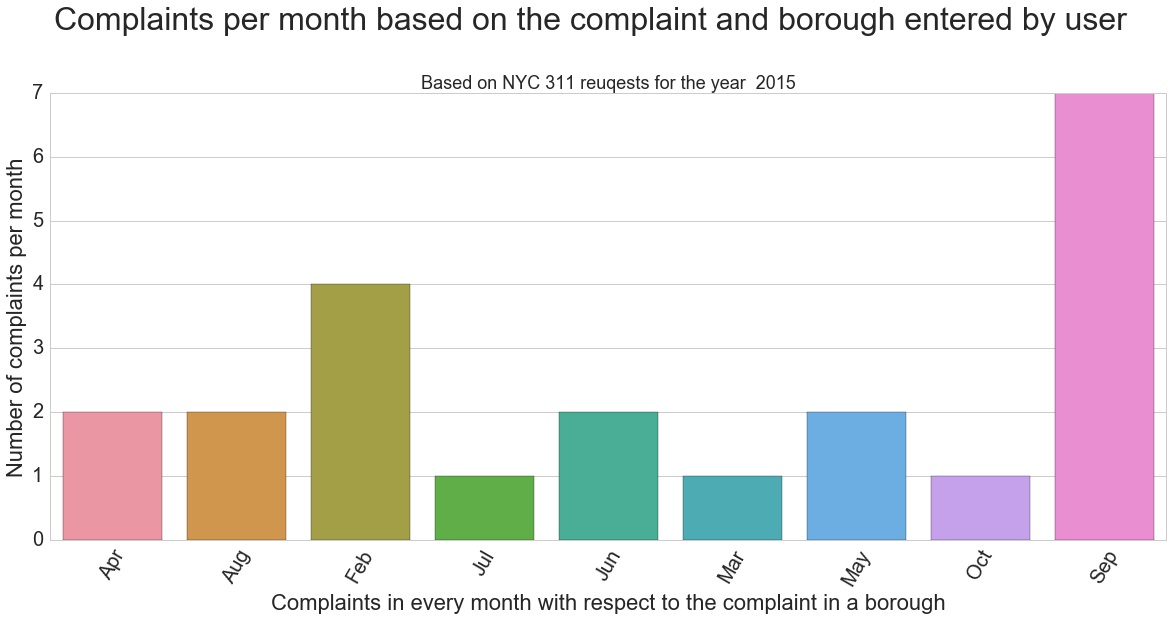

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Month", y="count", data=dfmonthcount)
plt.xlabel("Complaints in every month with respect to the complaint in a borough")
plt.ylabel("Number of complaints per month")
plt.suptitle("Complaints per month based on the complaint and borough entered by user", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/complaintspermonth.png", bbox_inches='tight')